In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  7 11:40:56 2021

@author: Thomas
"""
# %%
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import glob

In [3]:
#os.chdir('G:/spiced')
# %%
df = pd.DataFrame()

## import data into dataframe
for file in glob.glob('./data/'+'*.csv'):
    print(file)
    dummy = pd.read_csv(file, sep=';', parse_dates=['timestamp'], index_col=['timestamp'])
    df = df.append(dummy)

./data/tuesday.csv
./data/monday.csv
./data/thursday.csv
./data/wednesday.csv
./data/friday.csv


In [4]:
df = df.sort_index()
df.head()

,customer_no,location
timestamp,,
2019-09-02 07:03:00,2,dairy
2019-09-02 07:03:00,1,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,8,fruit
2019-09-02 07:04:00,4,dairy


In [5]:
# add weekday column, and replace it with day_name

df['weekday'] = df.index.dayofweek
df['weekday'] = df['weekday'].apply(lambda x: calendar.day_name[x])
df.head()

,customer_no,location,weekday
timestamp,,,
2019-09-02 07:03:00,2,dairy,Monday
2019-09-02 07:03:00,1,dairy,Monday
2019-09-02 07:04:00,3,dairy,Monday
2019-09-02 07:04:00,8,fruit,Monday
2019-09-02 07:04:00,4,dairy,Monday


In [6]:
# %%
df['location'].value_counts()
print(df['location'].value_counts())
df['customer_no'].value_counts().sum()
print(df['customer_no'].value_counts().sum())

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64
24877


In [7]:
# Calculate the total number of customers in each section

In [8]:
# Calculate the total number of customers in each section over time
df.groupby('location').resample('H')['customer_no'].count()

location  timestamp          
checkout  2019-09-02 07:00:00     92
          2019-09-02 08:00:00    112
          2019-09-02 09:00:00     85
          2019-09-02 10:00:00     90
          2019-09-02 11:00:00     55
                                ... 
spices    2019-09-06 17:00:00     65
          2019-09-06 18:00:00     98
          2019-09-06 19:00:00     65
          2019-09-06 20:00:00     54
          2019-09-06 21:00:00     20
Name: customer_no, Length: 555, dtype: int64

In [9]:
# %%
# Display the number of customers at checkout over time

In [10]:
# %%
# Calculate the time each customer spent in the market

df['timestamp'] = df.index
time_spent = df.groupby(['weekday','customer_no'], as_index=False).agg({'timestamp':['min', 'max']})
time_spent['spent'] = time_spent['timestamp', 'max'] - time_spent['timestamp', 'min']
time_spent.head()
# extract integer (minutes)?

weekday customer_no           timestamp                               spent
                                      min                 max                
0  Friday           1 2019-09-06 07:00:00 2019-09-06 07:05:00 0 days 00:05:00
1  Friday           2 2019-09-06 07:00:00 2019-09-06 07:01:00 0 days 00:01:00
2  Friday           3 2019-09-06 07:00:00 2019-09-06 07:11:00 0 days 00:11:00
3  Friday           4 2019-09-06 07:01:00 2019-09-06 07:02:00 0 days 00:01:00
4  Friday           5 2019-09-06 07:01:00 2019-09-06 07:15:00 0 days 00:14:00

In [11]:
# %%
# Calculate the total number of customers in the supermarket over time
# forward fill to fill out the timestamps

df2 = df.groupby(['weekday','customer_no'], as_index=False).resample('1Min').ffill()
df2.head()

customer_no location weekday           timestamp
  timestamp                                                            
0 2019-09-06 07:00:00            1    dairy  Friday 2019-09-06 07:00:00
  2019-09-06 07:01:00            1    dairy  Friday 2019-09-06 07:00:00
  2019-09-06 07:02:00            1    dairy  Friday 2019-09-06 07:00:00
  2019-09-06 07:03:00            1    dairy  Friday 2019-09-06 07:00:00
  2019-09-06 07:04:00            1   spices  Friday 2019-09-06 07:04:00

<ipython-input-12-138cc630f976>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_friday['datetime'] = df2_friday.index.get_level_values(1)


Text(0.5, 1.0, 'the total number of customers in the supermarket on Friday over time')

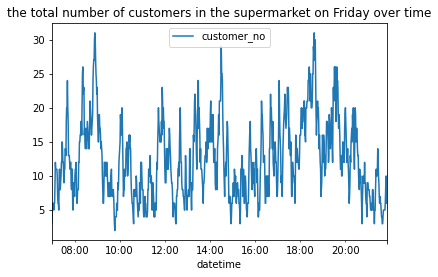

In [12]:
# %%
df2_friday = df2[df2['weekday']=='Friday']
df2_friday['datetime'] = df2_friday.index.get_level_values(1)
df2_friday.groupby(['datetime']).count().plot(y='customer_no')
plt.title('the total number of customers in the supermarket on Friday over time')

In [13]:
# %%
df3 =df.groupby(['weekday','customer_no'], as_index=False).agg({'timestamp':['min']})

In [14]:
# get the next location of the custoners

df2['next_location']=df2.groupby(['weekday','customer_no'])['location'].shift(-1)

In [31]:
# Calculate the total number of customers in each section in the begining of the day

vector_base = df2.groupby(['weekday','customer_no']).first().value_counts('location', normalize=True)
#vector_base['checkout'] = 0.0
vector_base

location
fruit     0.377435
dairy     0.287576
spices    0.181464
drinks    0.153526
dtype: float64

In [16]:
# %%
#last_stations = df.groupby(['weekday','customer_no'], as_index=False).last()
#no_checkout = last_stations[last_stations['location']!='checkout']

# %%
#row_filter = df['customer_no'].isin(no_checkout['customer_no']) & df['weekday'].isin(no_checkout['weekday'])

In [17]:
df2.fillna('checkout', inplace=True)
P = pd.crosstab(df2['location'], df2['next_location'], normalize='index')
P

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.103466,0.736750,0.058569,0.049848,0.051367
drinks,0.215710,0.010899,0.598499,0.087909,0.086983
fruit,0.201605,0.095924,0.054847,0.596947,0.050677
spices,0.150685,0.193214,0.163109,0.090953,0.402039


In [18]:
# all rows have to sum up to one
assert all(P.sum(axis=1) > 0.999)

In [19]:
vector_base

location
fruit       0.377435
dairy       0.287576
spices      0.181464
drinks      0.153526
checkout    0.000000
dtype: float64

In [32]:
initial = (vector_base*100).round(0)
initial = np.array(initial)
initial

array([38., 29., 18., 15.])

In [29]:
initial = [0.0, 38., 29., 18., 15.] # added 0.0 for checkout
initial = np.array(initial)
for t in range(20):
    initial = initial.dot(P)
    print(t,initial)
initial.round(0)

0 [16.07647068 32.93741669 23.01596883 16.55291026 11.41723355]
1 [29.50670943 28.31128672 18.47427259 14.58480446  9.1229268 ]
2 [40.73611283 24.22140446 15.00295806 12.57141863  7.46810603]
3 [50.13828888 20.65748302 12.3054957  10.70999267  6.18873973]
4 [58.02179578 17.57661707 10.17156253  9.0676737   5.16235092]
5 [64.64046537 14.92768059  8.45647329  7.6527774   4.32260336]
6 [70.20331022 12.65941011  7.06027565  6.44896671  3.62803732]
7 [74.88293711 10.72337021  5.91248732  5.43137634  3.04982901]
8 [78.82238137  9.07515358  4.96202272  4.57393105  2.56651129]
9 [82.14057232  7.67483733  4.17077463  3.85240828  2.16140744]
10 [84.93669217  6.48704726  3.50954905  3.24549167  1.82121985]
11 [87.29366443  5.48078921  2.95546346  2.73491726  1.53516564]
12 [89.28096284  4.62914346  2.4902469   2.30524516  1.29440164]
13 [90.95688933  3.90888811  2.09909832  1.94350618  1.09161806]
14 [92.37043431  3.30009669  1.76989562  1.63883485  0.92073853]
15 [93.56280545  2.78573993  1.4926

array([97.,  1.,  1.,  1.,  0.])

In [25]:
# Creating a state diagram with pygraphviz
import pygraphviz as pgv

ModuleNotFoundError: No module named 'pygraphviz'

In [ ]:
states = ['dairy','drinks','fruit','spices','checkout']

# init the graph
G = pgv.AGraph(strict=False,directed=True)

# loop over all pairs of states
for state_from in states:
    for state_to in states:
        # get the transition probability
        proba = P.loc[state_from, state_to]
        # draw into the graph if the probability is larger zero
        if proba > 0:
            G.add_edge(state_from, state_to, label=np.round(proba, 2))

# write the graph to hard drive            
G.draw('transition.png', prog='dot')

In [33]:
## Writing a Customer class
import random
# Create a class

class Customer:
    """
    a single customer that moves through the supermarket
    in a MCMC simulation
    """

    # Write a constructor

    def __init__(self, name, state, matrix, budget=100):
        self.name = name
        self.state = state
        self.budget = budget
        self.matrix = matrix
    
    # Include a __repr__() method
    def __repr__(self):
        return f'<Customer {self.name} in {self.state}>'

    # Add a method
    def next_state(self):
        '''
        Propagates the customer to the next state.
        Returns nothing.
        '''
        self.state = random.choices(['checkout','dairy','drinks','fruit','spices'],
                                   self.matrix.loc[self.state])
        
        self.state = self.state[0]
        #if self.state != 'checkout':
        #    self.state = random.choice(['dairy','drinks','fruit','spices','checkout'])
        return self.state
    

In [37]:
# Step 2: Instantiate the class
cust1 = Customer("Jake", "spices", P, 50)
cust2 = Customer("Margaret", "spices", P)

In [38]:
# Access attributes
print(cust1.name, cust1.state)
print(cust2.name, cust2.budget)

Jake spices
Margaret 100


In [41]:
cust1.next_state()
print(cust1.state)

checkout


---
#### Old ways to get the next station

In [ ]:
# define first_stations, second_stations, third_stations...

first_stations = df.groupby(['weekday','customer_no']).nth(0)['location']
second_stations = df.groupby(['weekday','customer_no']).nth(1)['location']
third_stations = df.groupby(['weekday','customer_no']).nth(2)['location']

# use second_stations, third_stations
new_df = pd.merge(second_stations, third_stations,  
    how='left', 
    left_on=['weekday','customer_no'], 
    right_on = ['weekday','customer_no'])

new_df.fillna('checkout', inplace=True)

In [ ]:
P = pd.crosstab(new_df['location_x'], new_df['location_y'], normalize='index')
P

In [ ]:
assert all(P.sum(axis=1) > 0.999)

In [ ]:
# use first_stations, second_stations

new_df2 = pd.merge(first_stations, second_stations,  
    how='left', 
    left_on=['weekday','customer_no'], 
    right_on = ['weekday','customer_no'])

new_df2.fillna('checkout', inplace=True)

In [ ]:
#P['checkout']=[1.0, 0.0, 0.0, 0.0, 0.0]
P2 = pd.crosstab(new_df2['location_x'], new_df2['location_y'], normalize='index')
P2

In [ ]:
P2.loc['checkout']=[1.0, 0.0, 0.0, 0.0, 0.0]
# rearrange the row order
P2 = P2.loc[['checkout','dairy','drinks','fruit','spices']] #[[]] a list of index values
P2

In [ ]:
## test test test